### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

In [ ]:
# Write your code from here

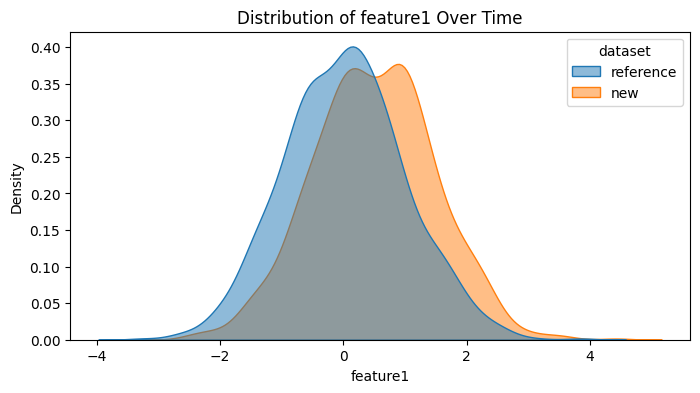

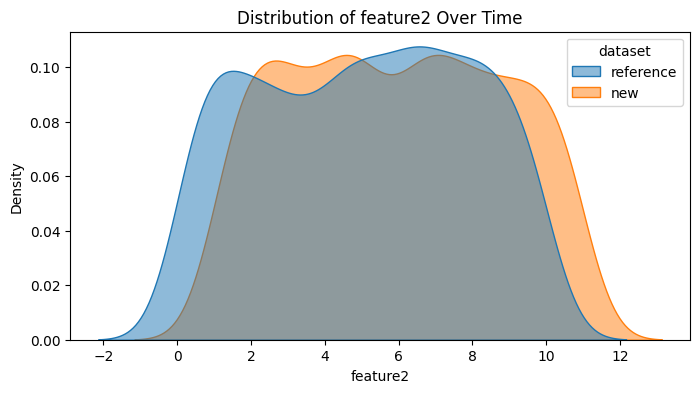


Feature Drift Detection:
feature1: F-score = 117.29, p-value = 0.0000 (Drift Detected)
feature2: F-score = 50.01, p-value = 0.0000 (Drift Detected)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Simulated example data
np.random.seed(42)
# Reference data
reference_data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.uniform(0, 10, 1000),
    'label': np.random.choice([0, 1], 1000)
})

# New data with slight drift
new_data = pd.DataFrame({
    'feature1': np.random.normal(0.5, 1, 1000),  # Mean shifted
    'feature2': np.random.uniform(1, 11, 1000),  # Range shifted
    'label': np.random.choice([0, 1], 1000)
})

# Combine and label datasets
reference_data['dataset'] = 'reference'
new_data['dataset'] = 'new'
combined = pd.concat([reference_data, new_data])

# Plot distribution of features
for column in ['feature1', 'feature2']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=combined, x=column, hue='dataset', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {column} Over Time')
    plt.show()

# Statistical Test: ANOVA F-test to detect drift
X = pd.concat([reference_data[['feature1', 'feature2']], new_data[['feature1', 'feature2']]])
y = [0]*len(reference_data) + [1]*len(new_data)  # 0 = reference, 1 = new
f_scores, p_values = f_classif(X, y)

print("\nFeature Drift Detection:")
for feature, score, p in zip(X.columns, f_scores, p_values):
    print(f"{feature}: F-score = {score:.2f}, p-value = {p:.4f} {'(Drift Detected)' if p < 0.05 else '(No Drift)'}")
